# Premiers pas avec des graphiques simples

Dans les paragraphes qui suivent nous donnons un aperçu des fonctionnalités de matplotlib avec les types de graphiques les plus courants. Il nous est impossible d'être exhaustif. Pour des besoins plus spécifiques, il faudra se tourner vers des ressources plus complètes telles que :
- la documentation de matplotlib https://matplotlib.org/contents.html
- les questions-réponses de stackoverflow https://stackoverflow.com/questions/tagged/matplotlib

## Nommage

Il est possible de nommer le graphique en cours via méthode `pyplot.title`.

Un graphique dispose d'un axe horizontal et d'un axe vertical. Il est possible de nommer ces axes grâce aux méthodes `pyplot.xlabel` et `pyplot.ylabel`.

La méthode `pyplot.legend` permet d'intégrer une légende.

L'ensemble des méthodes indiquées précédemment prennent en outre des arguments permettant la mise en forme des différents éléments.

L'illustration de ces méthodes sera effectuée plus bas.

## Nuages de points

Les nuages de points sont obtenus grâce à la méthode `pyplot.scatter`. Ses deux premiers arguments sont respectiments les listes d'abscisses et de coordonnées des points à afficher.

Parmi les arguments optionnels suppélementaires :
- `label` permet d'attribuer un nom au jeu de données (utilisable dans les légendes)
- `c` permet de donner la couleur de l'ensemble des points ou la liste des couleurs pour les points successifs.
- `s` permet de spécifier la taille des points ou la liste des tailles pour les points successifs.
- `marker` permet de spécifier la forme des points.

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

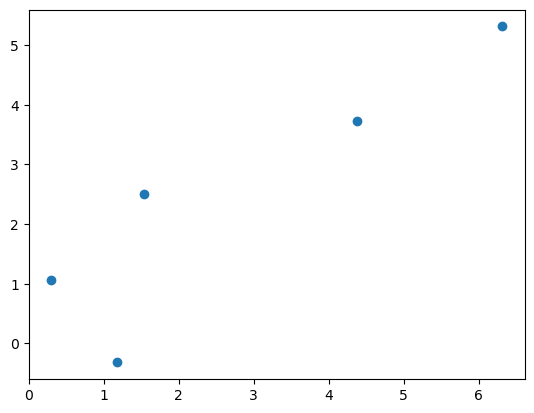

In [6]:
import numpy as np
x = np.array(range(1,6))
y = np.array(range(1,6))
x = x + np.random.randn(x.shape[0])
y = y + np.random.randn(y.shape[0])
plt.figure()
plt.scatter(x,y)


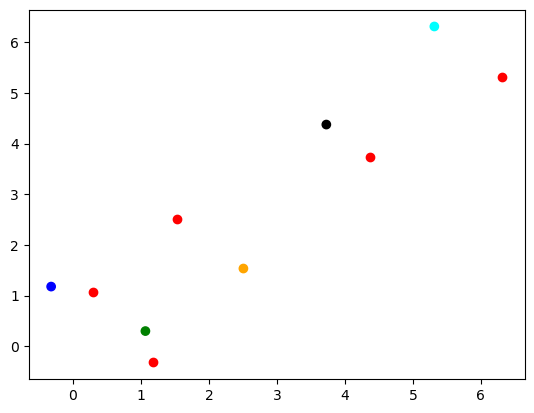

In [7]:
plt.figure()
plt.scatter(x,y,c='red')
plt.scatter(y,x,c=['green','blue','orange', 'black', 'cyan'])

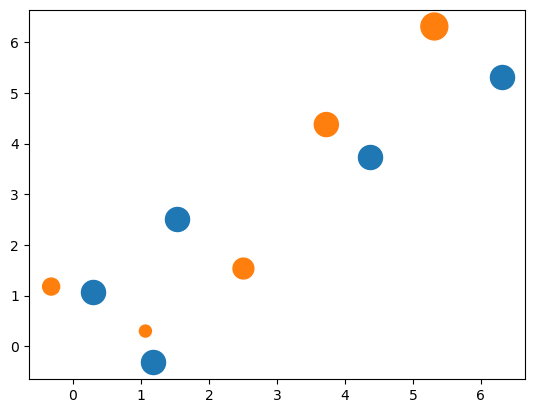

In [8]:
plt.figure()
plt.scatter(x,y,s=300)
plt.scatter(y,x,s=[75*(i+1) for i in range(len(x))])

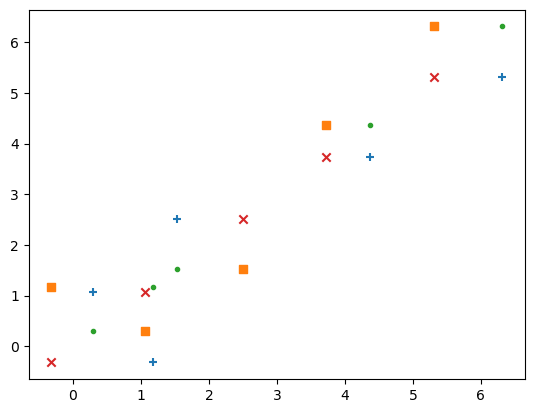

In [9]:
plt.figure()
plt.scatter(x,y,marker='+')
plt.scatter(y,x,marker='s')
plt.scatter(x,x,marker='.')
plt.scatter(y,y,marker='x')


Text(0, 0.5, 'Ordonnées des points')

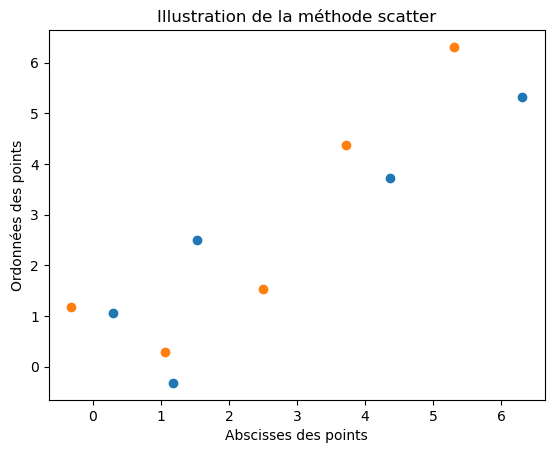

In [10]:
plt.figure()
plt.scatter(x,y,label='Jeu de données 1')
plt.scatter(y,x,label='Jeu de données 2')
plt.title("Illustration de la méthode scatter")
plt.xlabel("Abscisses des points")
plt.ylabel("Ordonnées des points")
#plt.legend()

In [ ]:
plt.legend()

In [ ]:
plt.figure()
plt.scatter(x,y,label='Jeu de données 1')
plt.scatter(y,x,label='Jeu de données 2')
plt.title("Illustration de la méthode scatter", fontdict={'fontsize':18, 'fontweight':100}, loc='left')
plt.xlabel("Abscisses des points",fontsize='15', horizontalalignment='left')
plt.ylabel("Ordonnées des points", verticalalignment='bottom', horizontalalignment='right')
plt.legend(loc=4, shadow=True, title='Légende')

## Graphiques en ligne

La méthode `pyplot.plot` va afficher des lignes sur un graphique disposant de deux axes othogonaux $x$ et $y$. 

les arguments sont des couples de listes d'abscisses et d'ordonnées d'extrémités de polylignes (suite de segments). Il est possible d'indiquer des marqueurs (forme des extrémités) et des arguments relatifs aux lignes (couleur, pointillés...) via une chaîne de caractères.

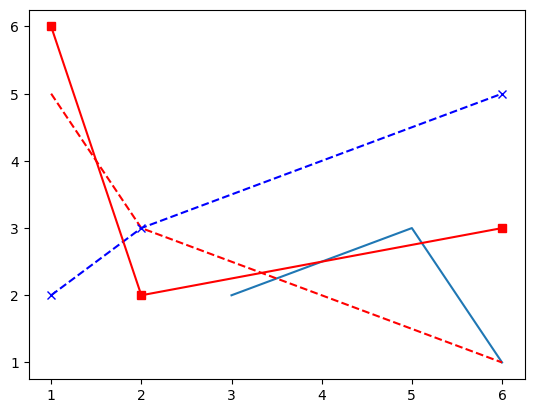

In [11]:
plt.figure()
plt.plot([3,5,6],[2,3,1])
plt.plot([1,2,6],[5,3,1], 'r--')
plt.plot([1,2,6],[2,3,5], 'xb--',[1,2,6],[6,2,3], 'sr-')


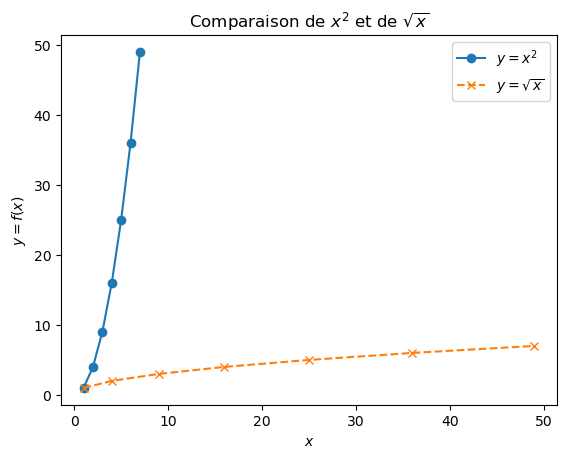

In [12]:
x = np.arange(1,8)
y = x ** 2
plt.figure()
plt.plot(x,y,'o-',label='$y=x^2$')
plt.plot(y,x,'x--',label='$y=\sqrt{x}$')
plt.title('Comparaison de $x^2$ et de $\sqrt{x}$')
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.legend()

Il aurait été possible de passer directement plusieurs couples de liste d'abscisses et de liste d'ordonnées.

Dans l'exemple qui suit, les deux séries de données sont interprétées comme des valeurs d'ordonnées, les abscisses étant automatiquement déterminées par l'indice des valeurs.

Il aurait pu être possible d'ajouter d'autres séries.

À noter qu'il est possible d'indiquer directement à la méthode `pyplot.legend` les intitulés des séries pour le cas où ils n'auraient pas été indiqués avec l'attribut `label` de `pyplot.plot`.

In [ ]:
plt.figure()
plt.plot(x,'-o',y,'-s')
plt.legend(['Linéaire', 'Quadratique'])

La méthode `fill_between` de la couche _Artiste_ permet de spécifier une couleur de remplissage entre les deux courbes.

TypeError: alpha must be numeric or None, not a string

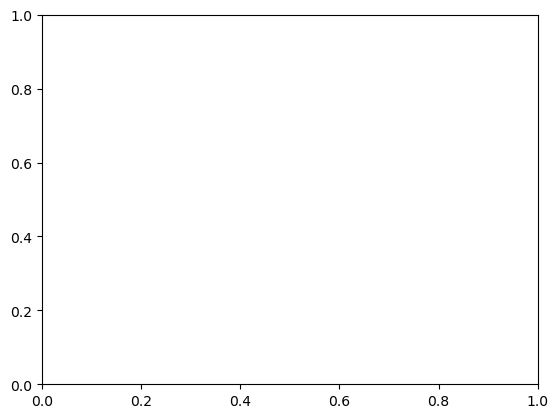

In [13]:
plt.gca().fill_between(range(2,5),
                      x[2:5],y[2:5],facecolor='purple',alpha='0.25')

In [ ]:
import pandas as pd

plt.figure()
dates = np.arange('2018-01-01','2018-01-08',dtype='datetime64[D]')
dates = list(map(pd.to_datetime,dates))
plt.plot(dates,x,'rx-',dates,y,'bs--')

Pour corriger le problème, on peut intervenir au niveau de la couche _Artiste_ et plus particulièrement sur l'axe $x$.

In [ ]:
axe_x = plt.gca().xaxis
for text in axe_x.get_ticklabels():
    text.set_rotation(45)

In [ ]:
plt.subplots_adjust(bottom=0.25)

## Diagrammes en barres

Les diagramme en barres sont créés grâce à la méthode `pyplot.bar` à laquelle on passe en argument la liste des labels de l'axe $x$ et la liste des hauteurs des barres.

Cette méthode dispose d'options permettant par exemple de spécifier la largeur des barres, leur couleur, la hauteur de base, des barres d'erreurs, l'orientation...

In [ ]:
plt.figure()
xvals = range(len(x))
plt.bar(xvals,x)

In [ ]:
plt.figure()
xvals = range(len(x))
plt.bar(xvals,x,width=0.3)

In [ ]:

new_xvals = [i+0.3 for i in xvals]
plt.bar(new_xvals,y,width=0.3,color='red')


In [ ]:
import random
xerrs = [random.randint(0,10) for i in range(len(x))]

plt.bar(xvals,x,width=0.3,yerr=xerrs)

In [ ]:
plt.figure()
plt.bar(xvals,x,color='b',width=0.3)
plt.bar(xvals,y,color='r',width=0.3, bottom=x)


L'orientation peut également être changée par un appel à la méthode `pyplot.barh`.

In [ ]:
plt.figure()
plt.barh(xvals,x,color='b',height=0.3, )
plt.barh(xvals,y,color='r',height=0.3, left=x)
